<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Implementing_YT_EXercise(XGB%2CRDT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kernel SVM

## Importing the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [62]:
df = pd.read_csv('Crop_recommendation.csv')


# Observing our data:

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [64]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [65]:
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [66]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


No Null Values Found

# Let's make our Data more Readable:

In [67]:
df = df.rename(columns={'label': 'crops','N':'Nitrogen','P':'Phosphorus','K':'Pottasium'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Pottasium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crops        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [68]:
pd.unique(df['crops'])

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [69]:
# Check for Unbalanced Data:
pd.value_counts(df['crops'])

/tmp/ipython-input-1647630980.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['crops'])


,count
crops,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


Nope all Clear WE are good to go

# Let's separate Independent and dependant Variable:

In [70]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [71]:
X

,Nitrogen,Phosphorus,Pottasium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


# Let's take a Look at the Heatmap of data Distribution:

<Axes: >

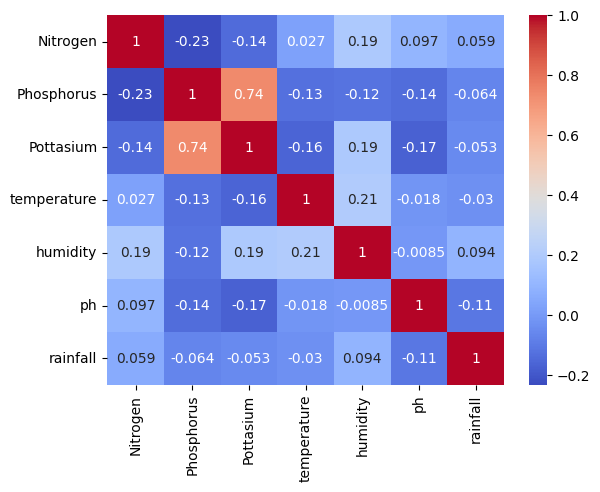

In [72]:
X_df_for_corr = df.iloc[:, :-1]
sns.heatmap(X_df_for_corr.corr(),annot=True,cmap="coolwarm")

In [73]:
# Phosphorus has a minimum effect so removing Phosphorus to reduce Multicollinearity:
X = X.drop(columns=["Phosphorus"])
X

,Nitrogen,Pottasium,temperature,humidity,ph,rainfall
0,90,43,20.879744,82.002744,6.502985,202.935536
1,85,41,21.770462,80.319644,7.038096,226.655537
2,60,44,23.004459,82.320763,7.840207,263.964248
3,74,40,26.491096,80.158363,6.980401,242.864034
4,78,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...
2195,107,32,26.774637,66.413269,6.780064,177.774507
2196,99,27,27.417112,56.636362,6.086922,127.924610
2197,118,30,24.131797,67.225123,6.362608,173.322839
2198,117,34,26.272418,52.127394,6.758793,127.175293


## Splitting the dataset into the Training set and Test set

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [75]:
print(X_test)

      Nitrogen  Pottasium  temperature   humidity        ph    rainfall
1320       105         50    26.214884  87.688398  6.419052   59.655908
1367        91         46    24.644585  85.499382  6.343943   48.312190
1291        14        203     9.724458  83.747656  6.158689   74.464111
264         52         79    17.257695  18.749440  7.840339   94.002872
728         32         17    34.946616  65.267740  7.162358   70.141514
...        ...        ...          ...        ...       ...         ...
1999       120         15    22.318719  83.861300  7.288377   65.357470
1171         9         32    32.269353  53.560928  5.870116   95.940354
2136        84         29    23.322932  53.003663  7.167093  168.264429
1882        31         33    29.699523  95.212244  6.342464  148.300369
938          5         40    24.692258  93.870301  6.297908  104.673545

[550 rows x 6 columns]


## Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
print(X_train)

[[ 2.25367108 -0.59141091 -0.33478022  0.56115786  0.28639844 -0.58838147]
 [-0.58434455  2.90385791  3.30046554  0.43651791 -1.09903674 -0.55053196]
 [-0.69245943 -0.57177457  0.78573023 -0.3258651   0.83531751 -0.65155552]
 ...
 [-0.42217223 -0.65031993  0.60028286 -0.35830141  0.03492274 -0.61450776]
 [-0.31405735 -0.4932292  -0.0088859  -0.10613716  1.5951916  -1.12940532]
 [-0.98977536 -0.76813798 -1.64915751  0.88678747  0.09156286  0.16200634]]


## Training the Model on the Training set:

---



In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

grid_search = GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [79]:
print(X_train)

[[ 2.25367108 -0.59141091 -0.33478022  0.56115786  0.28639844 -0.58838147]
 [-0.58434455  2.90385791  3.30046554  0.43651791 -1.09903674 -0.55053196]
 [-0.69245943 -0.57177457  0.78573023 -0.3258651   0.83531751 -0.65155552]
 ...
 [-0.42217223 -0.65031993  0.60028286 -0.35830141  0.03492274 -0.61450776]
 [-0.31405735 -0.4932292  -0.0088859  -0.10613716  1.5951916  -1.12940532]
 [-0.98977536 -0.76813798 -1.64915751  0.88678747  0.09156286  0.16200634]]


In [80]:
print(y_train)

1975       cotton
1287       grapes
760     blackgram
267      chickpea
2007         jute
          ...    
1033       banana
1731       papaya
763     blackgram
835        lentil
1653       orange
Name: crops, Length: 1650, dtype: object


In [81]:
print(X_test)

[[ 1.46983819  0.03695202  0.14748028  0.73119109 -0.07177737 -0.79284878]
 [ 1.09143611 -0.04159334 -0.16720136  0.63244639 -0.17060505 -0.99778658]
 [-0.98977536  3.0413123  -3.15713511  0.55342752 -0.41435709 -0.52532091]
 ...
 [ 0.90223507 -0.37541115 -0.43205535 -0.83340833  0.91247799  1.16929376]
 [-0.53028711 -0.29686578  0.8457881   1.07058549 -0.17255083  0.8086192 ]
 [-1.23303384 -0.15941139 -0.15764782  1.01005156 -0.23117683  0.02044856]]


In [82]:
print(y_test)

1320     watermelon
1367     watermelon
1291         grapes
264        chickpea
728       blackgram
           ...     
1999         cotton
1171          mango
2136         coffee
1882        coconut
938     pomegranate
Name: crops, Length: 550, dtype: object


## Predicting a new result

In [83]:
y_pred = classifier.predict(X_test)

## Predicting the Test set results

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016362,0.000295,0.002901,0.000120,gini,None,1,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.987879,0.969697,0.972727,0.978788,0.987879,0.979394,0.007521,1
1,0.020971,0.008090,0.003907,0.000903,gini,None,1,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.987879,0.972727,0.972727,0.975758,0.987879,0.979394,0.007016,1
2,0.024630,0.008107,0.005005,0.002803,gini,None,1,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.987879,0.966667,0.972727,0.972727,0.987879,0.977576,0.008699,3
3,0.042333,0.009769,0.007823,0.002112,gini,None,2,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.975758,0.969697,0.966667,0.966667,0.990909,0.973939,0.009111,8
4,0.036549,0.003625,0.007734,0.002230,gini,None,2,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.984848,0.963636,0.978788,0.969697,0.990909,0.977576,0.009885,3


## Testing the Model Accuracy:

In [86]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_classifier = DecisionTreeClassifier(**best_params)
best_classifier.fit(X_train,y_train)
y_pred = best_classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy 0.9818181818181818


## Implementing the XGB classifier model:

In [87]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split

# Initialize XGBoost (removed deprecated parameter)
xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=0)

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data
X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(
    X, y_encoded, test_size=0.25, random_state=0
)

# Define hyperparameter grid
param_gridX = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Grid search with cross-validation
grid_searchXG = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_gridX,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all CPU cores
    verbose=1    # Show progress
)

# Fit (no scaling needed for XGBoost!)
grid_searchXG.fit(X_train, y_train_xgb)

# Get best parameters
print("Best parameters:", grid_searchXG.best_params_)
print("Best score:", grid_searchXG.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.9842424242424244


## Visualising the Test set results

In [88]:
best_paramsXG = grid_searchXG.best_params_
print("Best Hyperparameters:", best_params)
best_xgb_clf = DecisionTreeClassifier(**best_params)
best_xgb_clf.fit(X_train,y_train_xgb)
y_predXG = best_xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test_xgb,y_pred_xgb)
print("Accuracy",accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy 0.9890909090909091


🔍 Running GridSearchCV...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
✅ Best CV Score: 0.9842

🚀 Training final model with best parameters...

📊 TEST SET PERFORMANCE:
   Accuracy:  0.9909
   Precision: 0.9915
   Recall:    0.9909
   F1-Score:  0.9909

🎨 Generating visualizations...


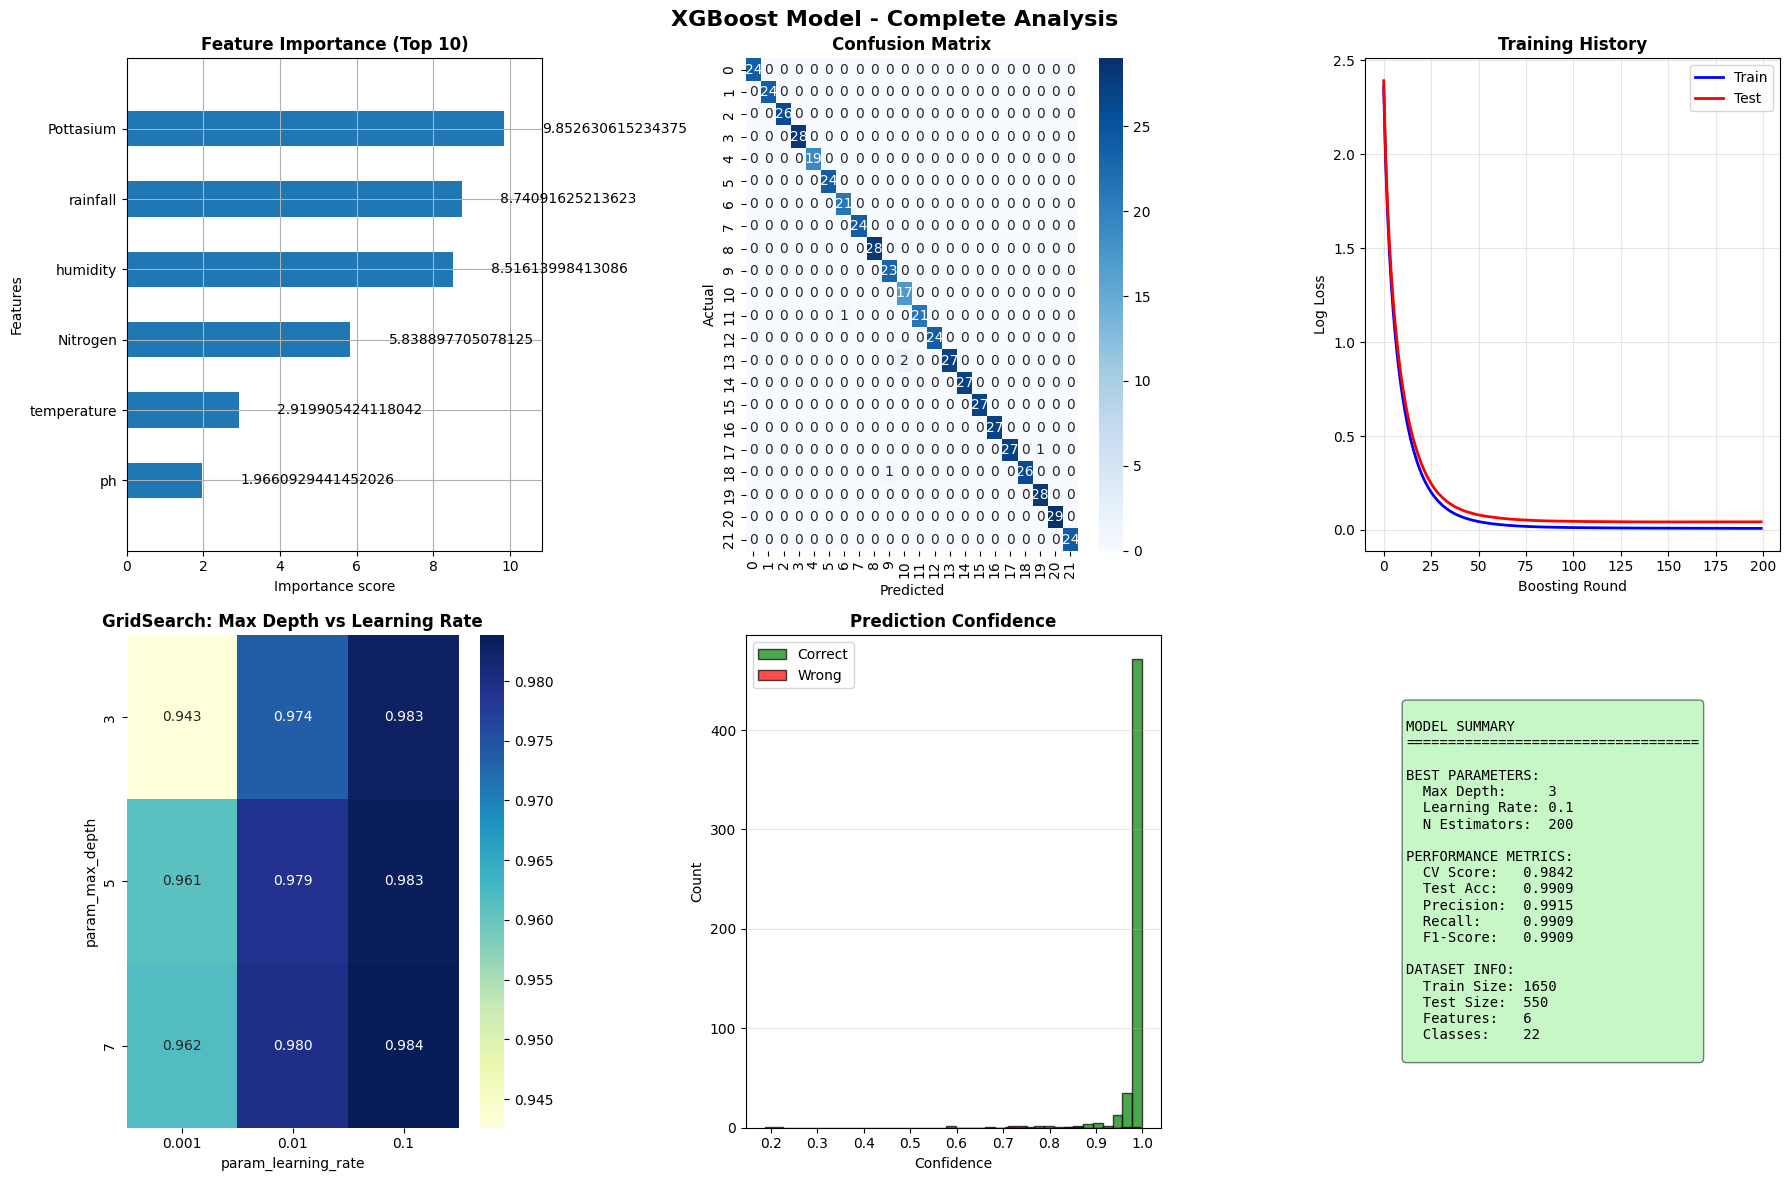


🌲 Plotting first decision tree...


/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


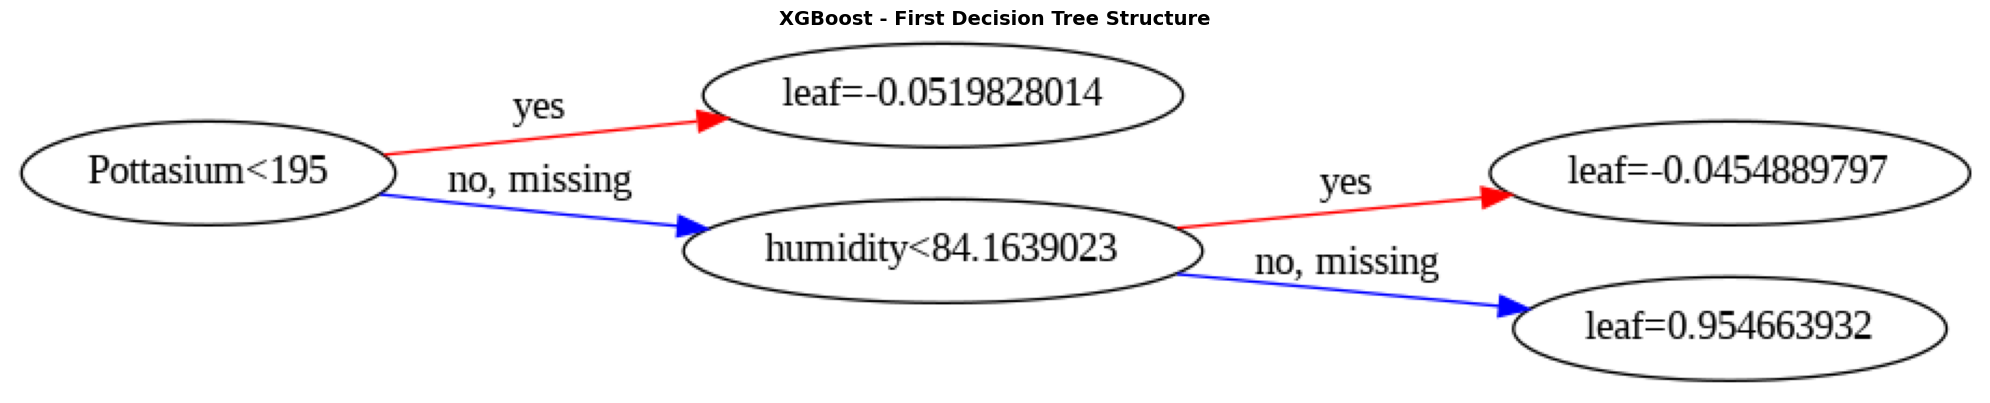


📋 DETAILED CLASSIFICATION REPORT:
                   precision    recall  f1-score   support

      Class apple       1.00      1.00      1.00        24
     Class banana       1.00      1.00      1.00        24
  Class blackgram       1.00      1.00      1.00        26
   Class chickpea       1.00      1.00      1.00        28
    Class coconut       1.00      1.00      1.00        19
     Class coffee       1.00      1.00      1.00        24
     Class cotton       0.95      1.00      0.98        21
     Class grapes       1.00      1.00      1.00        24
       Class jute       1.00      1.00      1.00        28
Class kidneybeans       0.96      1.00      0.98        23
     Class lentil       0.89      1.00      0.94        17
      Class maize       1.00      0.95      0.98        22
      Class mango       1.00      1.00      1.00        24
  Class mothbeans       1.00      0.93      0.96        29
   Class mungbean       1.00      1.00      1.00        27
  Class muskmelon   

In [89]:
"""
Your XGBoost Code with Complete Visualizations
==============================================
"""

from xgboost import XGBClassifier, plot_importance, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, accuracy_score, classification_report,
    precision_score, recall_score, f1_score
)


xgb_clf = XGBClassifier(eval_metric='mlogloss', random_state=0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Use your actual y

# Split data
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    X, y_encoded, test_size=0.25, random_state=0
)

# Grid search parameters
param_gridX = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Run grid search
print(" Running GridSearchCV...")
grid_searchXG = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_gridX,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_searchXG.fit(X_train_xgb, y_train_xgb)

# Get best model
best_model = grid_searchXG.best_estimator_
print(f"\n Best Parameters: {grid_searchXG.best_params_}")
print(f"\n Best CV Score: {grid_searchXG.best_score_:.4f}")

# Train final model with eval_set for plotting training history
print("\n Training final model with best parameters...")
final_model = XGBClassifier(**grid_searchXG.best_params_,
                           eval_metric='mlogloss', random_state=0)

eval_set = [(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)]
final_model.fit(X_train_xgb, y_train_xgb,
                eval_set=eval_set,
                verbose=False)

# Make predictions
y_pred = final_model.predict(X_test_xgb)
y_pred_proba = final_model.predict_proba(X_test_xgb)

# Calculate metrics
accuracy = accuracy_score(y_test_xgb, y_pred)
precision = precision_score(y_test_xgb, y_pred, average='weighted')
recall = recall_score(y_test_xgb, y_pred, average='weighted')
f1 = f1_score(y_test_xgb, y_pred, average='weighted')

print(f"\n TEST SET PERFORMANCE:")
print(f"   Accuracy:  {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall:    {recall:.4f}")
print(f"   F1-Score:  {f1:.4f}")


print("\n Generating visualizations...")

fig = plt.figure(figsize=(18, 12))

# Plot 1: Feature Importance
ax1 = plt.subplot(2, 3, 1)
plot_importance(final_model, ax=ax1, importance_type='gain',
               max_num_features=10, height=0.5)
ax1.set_title('Feature Importance (Top 10)', fontweight='bold', fontsize=12)

# Plot 2: Confusion Matrix
ax2 = plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test_xgb, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix', fontweight='bold', fontsize=12)
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# Plot 3: Training History
ax3 = plt.subplot(2, 3, 3)
results = final_model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

ax3.plot(x_axis, results['validation_0']['mlogloss'],
        label='Train', linewidth=2, color='blue')
ax3.plot(x_axis, results['validation_1']['mlogloss'],
        label='Test', linewidth=2, color='red')
ax3.set_title('Training History', fontweight='bold', fontsize=12)
ax3.set_xlabel('Boosting Round')
ax3.set_ylabel('Log Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: GridSearch Results Heatmap
ax4 = plt.subplot(2, 3, 4)
# Extract grid search results
results_df = pd.DataFrame(grid_searchXG.cv_results_)
pivot_table = results_df.pivot_table(
    values='mean_test_score',
    index='param_max_depth',
    columns='param_learning_rate',
    aggfunc='mean'
)
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax4)
ax4.set_title('GridSearch: Max Depth vs Learning Rate', fontweight='bold', fontsize=12)

# Plot 5: Prediction Confidence
ax5 = plt.subplot(2, 3, 5)
max_proba = np.max(y_pred_proba, axis=1)
correct = (y_pred == y_test_xgb)

ax5.hist(max_proba[correct], bins=20, alpha=0.7,
        label='Correct', color='green', edgecolor='black')
ax5.hist(max_proba[~correct], bins=20, alpha=0.7,
        label='Wrong', color='red', edgecolor='black')
ax5.set_title('Prediction Confidence', fontweight='bold', fontsize=12)
ax5.set_xlabel('Confidence')
ax5.set_ylabel('Count')
ax5.legend()
ax5.grid(True, alpha=0.3, axis='y')

# Plot 6: Model Summary
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

summary_text = f"""
MODEL SUMMARY
{'='*35}

BEST PARAMETERS:
  Max Depth:     {grid_searchXG.best_params_['max_depth']}
  Learning Rate: {grid_searchXG.best_params_['learning_rate']}
  N Estimators:  {grid_searchXG.best_params_['n_estimators']}

PERFORMANCE METRICS:
  CV Score:   {grid_searchXG.best_score_:.4f}
  Test Acc:   {accuracy:.4f}
  Precision:  {precision:.4f}
  Recall:     {recall:.4f}
  F1-Score:   {f1:.4f}

DATASET INFO:
  Train Size: {len(X_train_xgb)}
  Test Size:  {len(X_test_xgb)}
  Features:   {X_train_xgb.shape[1]}
  Classes:    {len(np.unique(y_encoded))}
"""

ax6.text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
        verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.suptitle('XGBoost Model - Complete Analysis',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('xgboost_complete_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


print("\n Plotting first decision tree...")
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(final_model, num_trees=0, ax=ax, rankdir='LR')
plt.title('XGBoost - First Decision Tree Structure',
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('xgboost_decision_tree.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n DETAILED CLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_test_xgb, y_pred,
                           target_names=[f"Class {c}" for c in le.classes_]))

print("\n All visualizations saved successfully!")
print("    xgboost_complete_analysis.png")
print("    xgboost_decision_tree.png")